### Clustering

In [ ]:
##Kmeans: deko dataset ma 2 ota kunai point lai randomly pick garera cluster ko center banauxa ie 2 ota cluster bana vaneko vayera 2 ota point choose garxa
tyo choose gareko cluster 1 ra 2 aba harek datapoint sanga distance nikalera compare garxa aba next ie same kura repeat garne processma agi ko cluster ko average lai naya cluster ko center maney ie 
cluster ko center update hunxa jaba samma same cluster repeat hudaina teti bela sama yo process repeat hunxa

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [18]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [14]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'annual_indome', 'spend_score'], dtype='object')

In [19]:
df= df.rename(columns={
    'Annual Income (k$)':'annual_income',
    'Spending Score (1-100)':'spend_score'
    
})

In [20]:
df.head()

,CustomerID,Gender,Age,annual_income,spend_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [21]:
X = df[['annual_income','spend_score']]
X.head()

,annual_income,spend_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [ ]:
#model fit garnu vanda agdi no of cluster(k) kati diney vanera thaha pauna paryo
#k means distance based ho so  datascaling pani garna paryo

In [23]:
#Scaling
scaler = StandardScaler()
xscaled = scaler.fit_transform(X)

In [24]:
xscaled
#scaled ta vako hunxa tara numpy array ma change gardinxa so ana dataframe banauna paryo

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [25]:
xscaled = pd.DataFrame(xscaled,columns = X.columns)
xscaled.head()

,annual_income,spend_score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [26]:
#now fiiting the kmeans
km = KMeans(n_clusters = 4)# ie 4 ota cluster bana vanera deko
km.fit(xscaled)

KMeans(n_clusters=4)

In [33]:
labels =km.labels_
labels#scaling gareko vayera neg ako ho

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [34]:
km.cluster_centers_

array([[ 1.00919971, -1.22553537],
       [-0.46948398,  0.2437994 ],
       [ 0.99158305,  1.23950275],
       [-1.30751869, -1.13696536]])

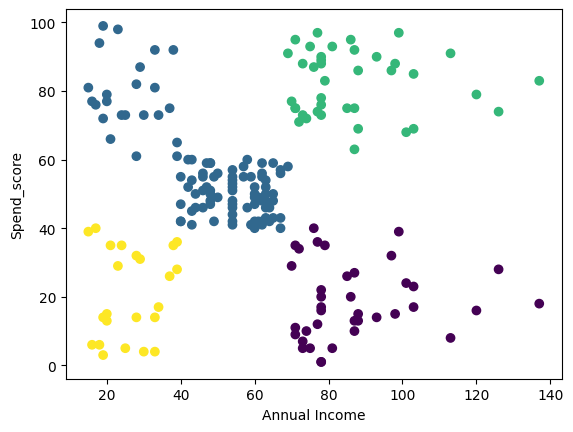

In [35]:
#now visualizing the clusters
#scatter plot original data ko nai banayera herne scaled vako data ma herda ni vayo tara before scaling wala data herda ramro
plt.scatter(X.annual_income,X.spend_score,c = labels)# c= labels ie label haru lai color deko
plt.xlabel('Annual Income')
plt.ylabel('Spend_score')
plt.show()
#yo scaled navako data ho

In [39]:
#cluster ko center pani pass garna milxa ie cluster ko center numpy array ma xa so dataframe ma change gareko
centers = pd.DataFrame(km.cluster_centers_,columns = ['P1','P2'])
centers.head()
#center pass garna xa bhane scaled vako value ma nai garna parxa

,P1,P2
0,1.009200,-1.225535
1,-0.469484,0.243799
2,0.991583,1.239503
3,-1.307519,-1.136965


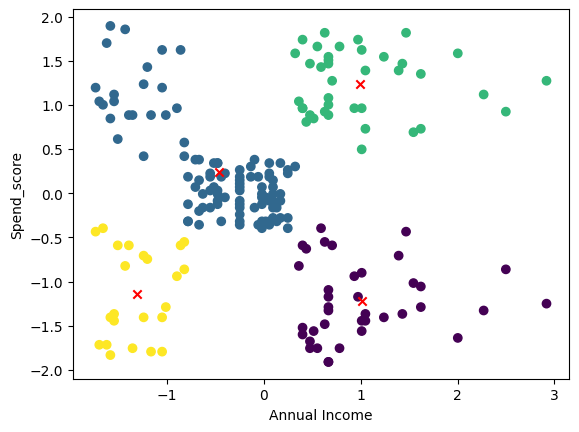

In [40]:
plt.scatter(xscaled.annual_income,xscaled.spend_score,c = labels)
plt.scatter(centers.P1,centers.P2, color = 'red', marker = 'x')
plt.xlabel('Annual Income')
plt.ylabel('Spend_score')
plt.show()
#scaled data ma scatter garda pattern chai change hudaina tara scaled vayera ako value haru auxa side ma

In [ ]:
#cluster lai interpret garne
jastai yello cluster ko low income ra low spend xa 
green cluster ko high income with high spending score
blue cluster interpret garna ali milena yeslai duita cluster garauan milxa ie 5 cluster thik holajasto xa data herda

##  finding the optimal no of cluster

WCSS:within cluster sum of squares also called Inertia:inertia jati kam ayo teti ramro model
yesma every cluster ko center sanga within cluster ko data point sanga ko distance calculate garxa ra tesari nai sabai cluster haru ko calculate
garera sum garxa 
Inertia:


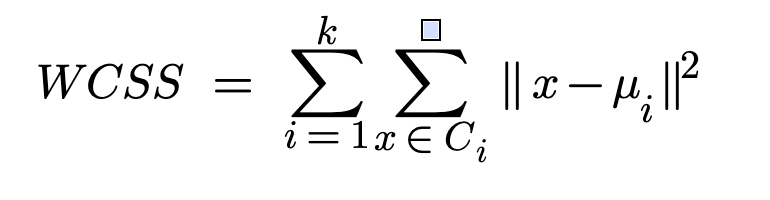

In [41]:
km.inertia_

108.92131661364357

In [ ]:
k=1 huda inertia kati auxa, k=2,k=3,k=4,k=5,k=6,k=7.k=8,k=9,k=10#(na derai na kam ie balanced lina paryo) sabai ko inertia nikalne ra optimal 

In [44]:
    wcss = []
    for k in range(1,11):
      kmodel = KMeans(n_clusters=k)
      kmodel.fit(xscaled)
    
      inertia = kmodel.inertia_
      wcss.append(inertia)

In [45]:
wcss # auta point ma distance big range ma ghatxa aru ma khasai ghatdaina so tei big amountle ghateko vaalue bata nai optimal cluster nikaleko

[400.0,
 274.0906128402975,
 157.70400815035947,
 146.97696118694716,
 65.57885579985047,
 57.381747460227864,
 46.87068757489706,
 46.299010669737,
 32.421683532347444,
 35.13917790258944]

In [ ]:
jati thorai cluster ie k =1 hunxa teti derai wcss badi ako xa

In [ ]:
#Elbow method: yo method bata no of optimal cluster nikalinxa


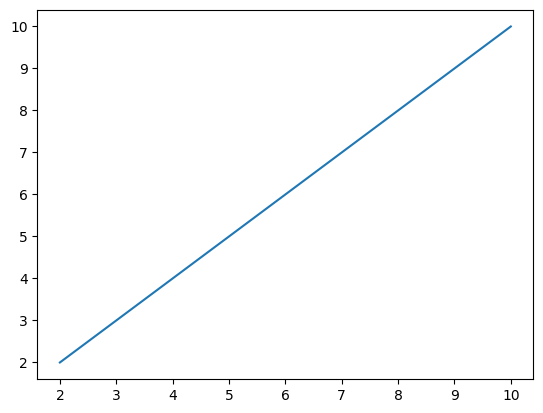

In [46]:
plt.plot(range(2,11), range(2,11))#line plot garxa ie 2 dekhi 10 samma auxa x ko value 2 huda y ko value pani 2bhayo
plt.show()


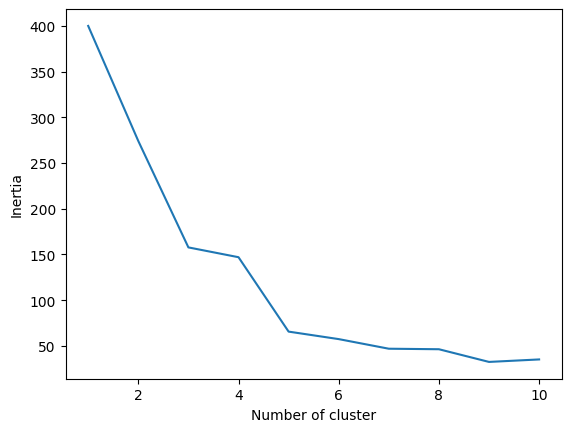

In [47]:
plt.plot(range(1,11), wcss)
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
plt.show()
#1 huda 300 ako thyo cluster, 2 huda arko 
#ja nira sharp turn dekhinxa tyo no of cluster liney vanxa elbow method le
#tyo sharp angle chai 5 ma parexa so aba no of cluster 5 ota cluster liney tei nai ho optimal cluster
